<a href="https://colab.research.google.com/github/Pratsa09/Bitcoin-prediction-forecasting/blob/master/Bitcoin_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!pip install-U -q PyDrive
!pip3 install --upgrade oauth2client
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

ERROR: unknown command "install-U" - maybe you meant "install"
Requirement already up-to-date: oauth2client in /usr/local/lib/python3.6/dist-packages (4.1.3)


In [5]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [6]:
downloaded = drive.CreateFile({'id' : '1CDESvspnp8OmyRjCumWQih-tdoBv4IoB'})

In [7]:
downloaded.GetContentFile('data for crypto(1).csv')

In [8]:
df=pd.read_csv('data for crypto(1).csv')

In [9]:
df.head()

,Date,Open,High,Low,Close,Volume BTC,Volume USDT
0,2020-11-08 07-AM,15003.58,15030.50,14966.00,14972.52,725.11,10876751.73
1,2020-11-08 06-AM,15048.67,15068.34,14968.58,15003.58,1335.08,20039575.90
2,2020-11-08 05-AM,14985.61,15092.18,14951.00,15048.67,1386.13,20824846.53
3,2020-11-08 04-AM,14957.41,15029.41,14928.85,14985.61,1671.59,25048538.80
4,2020-11-08 03-AM,15016.16,15044.96,14954.86,14957.41,1908.56,28622737.37


In [10]:
# Before preprocessiing or visualisation, we should figure out if the Hurst exponent so as to know whether modelling is beneficial or not? 

In [11]:
df.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close          0
Volume BTC     0
Volume USDT    0
dtype: int64

In [12]:
!pip install hurst
from hurst import compute_Hc,random_walk

In [13]:
df1 = df['Close']
type(df1)

pandas.core.series.Series

In [14]:
H,c,val = compute_Hc(df1)
print("Hurst Exponent :" , H)

Hurst Exponent : 0.5364039658879183


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28300 entries, 0 to 28299
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         28300 non-null  object 
 1   Open         28300 non-null  float64
 2   High         28300 non-null  float64
 3   Low          28300 non-null  float64
 4   Close        28300 non-null  float64
 5   Volume BTC   28300 non-null  float64
 6   Volume USDT  28300 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.5+ MB


In [16]:
#Now since the Hurst exponent is greater than 0.5 it is an anti persistent series,hence modelling could work.


In [17]:
# Exploratory Data Analysis (Time series doesn't suppose normality of data therefore we do not need to see normality)

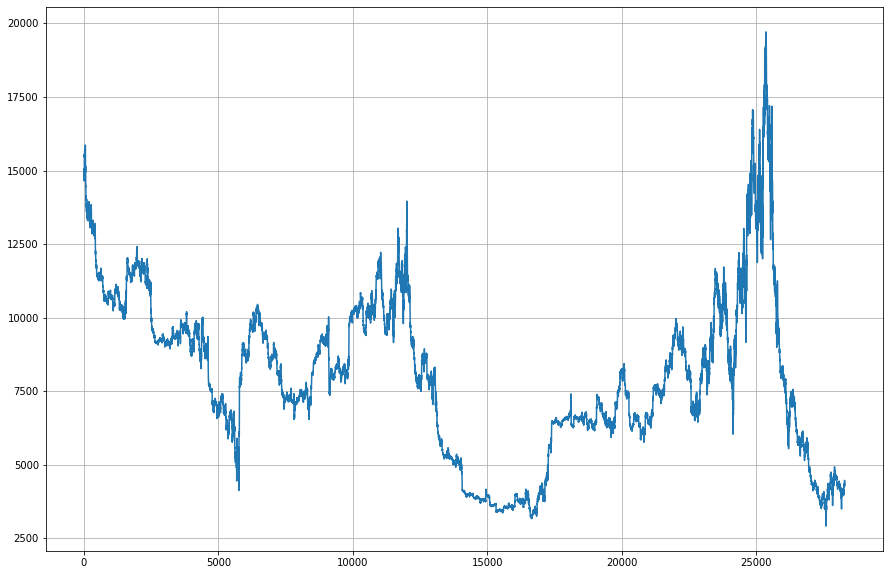

In [18]:
df1.plot(grid=True, figsize=(15, 10))

In [19]:
df['Close'].describe()

count    28300.000000
mean      8020.763622
std       2794.209425
min       2919.000000
25%       6336.517500
50%       7964.855000
75%       9736.025000
max      19709.500000
Name: Close, dtype: float64

In [20]:
df1[0:5000].describe()

count     5000.000000
mean     10289.308764
std       1615.526152
min       6573.150000
25%       9235.055000
50%      10053.180000
75%      11381.822500
max      15864.510000
Name: Close, dtype: float64

In [21]:
df1[5000:10000].describe()

count     5000.000000
mean      8102.764832
std       1169.192397
min       4130.640000
25%       7245.972500
50%       8146.615000
75%       9012.895000
max      10452.970000
Name: Close, dtype: float64

In [22]:
df1[10000:15000].describe()

count     5000.000000
mean      7913.052882
std       2790.435583
min       3700.010000
25%       5182.852500
50%       8288.775000
75%      10333.230000
max      13960.760000
Name: Close, dtype: float64

In [23]:
df1[15000:20000].describe()

count    5000.000000
mean     5287.178744
std      1474.396663
min      3172.050000
25%      3692.015000
50%      6260.065000
75%      6540.810000
max      8266.210000
Name: Close, dtype: float64

In [24]:
df1[20000:].describe()

count     8300.000000
mean      8316.395708
std       3244.539512
min       2919.000000
25%       6250.727500
50%       7780.495000
75%       9677.250000
max      19709.500000
Name: Close, dtype: float64

In [25]:
# the mean fluctuates not a lot but it does. Even though they are somewhat in the same ballpark,they still need some transformation because there is clearly a seasonal component to the values but i think logging would improve the situation

In [26]:
#AUGMENTED DICKEY FULLER TEST

In [27]:
!pip install statsmodels
from statsmodels.tsa.stattools import adfuller


In [28]:
 #Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(df1, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
  print (dfoutput)
if dfoutput['Test Statistic'] < dfoutput['Critical Value (5%)']:
  print('Series is stationary')
else:
    print('Series is not stationary ')





Results of Dickey-Fuller Test:
Test Statistic                    -3.045285
p-value                            0.030876
#Lags Used                        50.000000
Number of Observations Used    28249.000000
Critical Value (1%)               -3.430582
dtype: float64
Test Statistic                    -3.045285
p-value                            0.030876
#Lags Used                        50.000000
Number of Observations Used    28249.000000
Critical Value (1%)               -3.430582
Critical Value (5%)               -2.861642
dtype: float64
Test Statistic                    -3.045285
p-value                            0.030876
#Lags Used                        50.000000
Number of Observations Used    28249.000000
Critical Value (1%)               -3.430582
Critical Value (5%)               -2.861642
Critical Value (10%)              -2.566824
dtype: float64
Series is stationary


In [29]:
# By the ADF test, the series is stationary

In [30]:
# KPSS TEST

In [31]:
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='ct')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
      print (kpss_output)

kpss_test(df1)

Results of KPSS Test:
Test Statistic           3.837178
p-value                  0.010000
Lags Used               50.000000
Critical Value (10%)     0.119000
dtype: float64
Test Statistic           3.837178
p-value                  0.010000
Lags Used               50.000000
Critical Value (10%)     0.119000
Critical Value (5%)      0.146000
dtype: float64
Test Statistic            3.837178
p-value                   0.010000
Lags Used                50.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
dtype: float64
Test Statistic            3.837178
p-value                   0.010000
Lags Used                50.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [32]:
# by KPSS,the series is non-stationary. Therefore,we have to change something in the data.

In [33]:
# KPSS = not stationary and ADF = stationary -> difference stationary, use differencing to make series stationary
 

In [34]:
stats, p, lags, critical_values = kpss(df1 , regression = 'c')
print(f'Test Statistics: {stats}')
print(f'p-value : {p}')
print(f'Critical Values : {critical_values}')

if p <0.05:
  print('Series is not stationary' )
else: 
  print('Series is stationary')

Test Statistics: 7.476516169304273
p-value : 0.01
Critical Values : {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is not stationary


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [35]:
# we have to do difference stationary to make the series stationary

In [36]:
# differencing and plotting

In [37]:
df_non_index = df.copy()

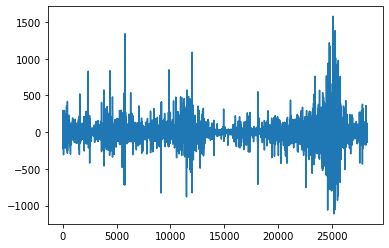

In [38]:
df_diff = df_non_index['Close'] - df_non_index['Close'].shift(1)
df_diff.dropna().plot()

In [39]:
stats, p, lags, critical_values = kpss(df_diff.dropna() , regression = 'c')
print(f'Test Statistics: {stats}')
print(f'p-value : {p}')
print(f'Critical Values : {critical_values}')

if p < 0.05:
  print('Series is not stationary' )
else: 
  print('Series is stationary')

Test Statistics: 0.08354536662447988
p-value : 0.1
Critical Values : {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is stationary


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [40]:
# the series is now stationary. Time series models can be applied appropriately now.

In [41]:
# AUTO-ARIMA,ARCH/GARCH,RNN(LSTM)

In [42]:
# for the parameters of ARIMA we need to first look at ACF and PACF plots. The d value here is 1 since we differenced it once to make it stationary.

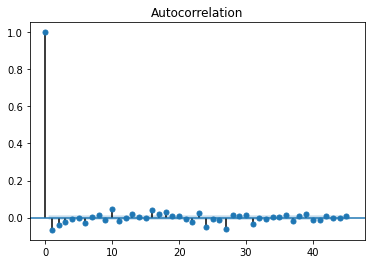

In [43]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_diff.dropna())
pyplot.show()
# does this eries have a long term trend?


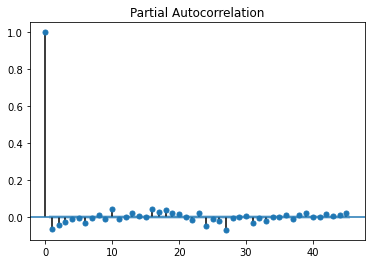

In [44]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_diff.dropna())
pyplot.show()


In [45]:
!pip3 install git+https://github.com/statsmodels/statsmodels.git

!pip install pmdarima


  Cloning https://github.com/statsmodels/statsmodels.git to /tmp/pip-req-build-dkvqcfsy
  Running command git clone -q https://github.com/statsmodels/statsmodels.git /tmp/pip-req-build-dkvqcfsy
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
ERROR: Operation cancelled by user


In [46]:
import pmdarima as pm

In [47]:
model = pm.auto_arima(df_diff.dropna(),start_p = 1 ,d=1 , start_q = 1, seasonal = False, test= 'adf',error_action = 'ignore',suppress_warnings = True,stepwise = True,trace =True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=19.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=356894.064, Time=0.82 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=348265.034, Time=1.88 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=12.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=356892.064, Time=0.31 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=344573.735, Time=2.56 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=342424.089, Time=3.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=341010.520, Time=4.04 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=340301.343, Time=4.91 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=74.98 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=46.74 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=340299.343, Time=1.98 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=341008.520, Time=1.60 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=20.98 sec
 ARIMA(4,1,1)(0,0,0)[0]            

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                28299
Model:               SARIMAX(5, 1, 0)   Log Likelihood             -170143.672
Date:                Tue, 10 Nov 2020   AIC                         340299.343
Time:                        12:56:18   BIC                         340348.846
Sample:                             0   HQIC                        340315.271
                              - 28299                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8813      0.002   -456.678      0.000      -0.885      -0.878
ar.L2         -0.7257      0.002   -292.701      0.000      -0.731      -0.721
ar.L3         -0.5476      0.003   -199.264      0.000      -0.553      -0.542
ar.L4         -0.3542      0.002   -141.982      0.000      -0.359      -0.349
ar.L5         -0.1575      0.002    -76.020      0.000      -0.162      -0.153
sigma2      9772.7368     19.626    497.957      0.000    9734.271    9811.202
===================================================================================
Ljung-Box (Q):                     2280.04   Jarque-Bera (JB):           1400361.00
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.72   Skew:                             1.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
# ARCH/GARCH model
df_diff[0:5000].dropna().var()

3383.1058068764323

In [50]:
df_diff[5000:10000].dropna().var()

4082.620625266655

In [51]:
df_diff[10000:15000].dropna().var()

5708.889097320873

In [52]:
df_diff[15000:20000].dropna().var()

1320.9382199613715

In [53]:
df_diff[20000:].dropna().var()

19351.929731345317

In [54]:
#Let us first see the change in variance to apply the models , GARCH models presuppose stationarity except for variance or volatility.you basically model the variance. Cannot predict using that

In [57]:
from random import gauss
from arch import arch_model

In [56]:
!pip install arch

     |████████████████████████████████| 798kB 5.4MB/s 


In [58]:
# GARCH(5,1,0)

In [59]:
prices = 100*df_diff.dropna().pct_change().dropna()

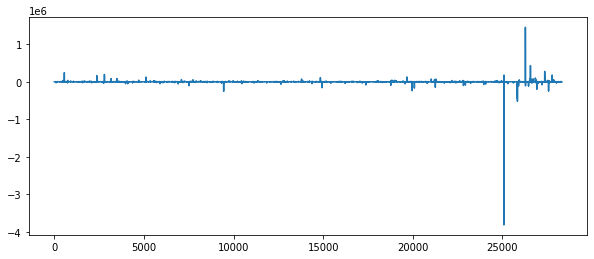

In [60]:
plt.figure(figsize=(10,4))
plt.plot(prices)

In [61]:
# This shows that the prices do not really have high volatility for us to model GARCH specifically. 

In [62]:
# Univariate LSTM models

In [63]:
# Bi-directional LSTM : Preprocessing the data first(A type of RNN)

In [64]:
# i am creating a copy of the original differenced series for safety purposes

In [65]:
df_diff1 = df_diff.dropna().copy()

In [66]:
df_diff1 # for the tensorflow model

1        31.06
2        45.09
3       -63.06
4       -28.20
5        58.75
         ...  
28295   -83.31
28296   -10.70
28297   -25.64
28298    -9.03
28299    -6.49
Name: Close, Length: 28299, dtype: float64

In [67]:
import tensorflow as tf

In [69]:
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential


In [70]:
from numpy import array

In [110]:
# VANILLA LSTM

In [161]:
# VANILLA LSTM TRY3

In [167]:
# creating a dataframe
df_diff1

1        31.06
2        45.09
3       -63.06
4       -28.20
5        58.75
         ...  
28295   -83.31
28296   -10.70
28297   -25.64
28298    -9.03
28299    -6.49
Name: Close, Length: 28299, dtype: float64

In [174]:
new_df = pd.DataFrame(index=range(0,len(df)),columns=['Close'])
for i in range(0,len(df_diff1)):
  new_df['Close'] = df_diff1

In [176]:
new_df = new_df.dropna()

In [177]:
new_df

,Close
1,31.06
2,45.09
3,-63.06
4,-28.20
5,58.75
...,...
28295,-83.31
28296,-10.70
28297,-25.64
28298,-9.03


In [178]:
# creating training and testing datasets
dataset = new_df.values

In [179]:
dataset

array([[ 31.06],
       [ 45.09],
       [-63.06],
       ...,
       [-25.64],
       [ -9.03],
       [ -6.49]])

In [180]:
train = dataset[0:18960,:]
test = dataset[18960:,:]

In [181]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [182]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)


In [183]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [185]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=2)


Epoch 1/10
18900/18900 - 115s - loss: 6.5578e-04
Epoch 2/10
18900/18900 - 114s - loss: 5.4695e-04
Epoch 3/10
18900/18900 - 113s - loss: 5.3429e-04
Epoch 4/10
18900/18900 - 113s - loss: 5.3186e-04
Epoch 5/10
18900/18900 - 113s - loss: 5.2653e-04
Epoch 6/10
18900/18900 - 113s - loss: 5.2496e-04
Epoch 7/10
18900/18900 - 112s - loss: 5.2317e-04
Epoch 8/10
18900/18900 - 112s - loss: 5.2114e-04
Epoch 9/10
18900/18900 - 112s - loss: 5.2078e-04
Epoch 10/10
18900/18900 - 112s - loss: 5.1929e-04


In [187]:
#predicting values, using past 60 from the train data
inputs = new_df[len(new_df) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [188]:
X_test = []
for i in range(60,inputs.shape[0]):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [189]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)


In [190]:
rms=np.sqrt(np.mean(np.power((test-closing_price),2)))
rms

131.8852212716085